# Group HWA1 - 2

Draw $X$ from density $g(x)$
- the upper bound $\overline{h}_n(x) = \log\{M_ng_n(x)\}$
- $\overline{h}_n(x) = \log\{M_ng_n(x)\}$ is formed by piecewise linear functions 
- It is formed by $r_n$ linear functions<br>
$$
g_n(x) = M_n^{-1} \left\{
    \exp(a_{-1} + b_{-1} x) 1_{[-\infty, x_0]}(x) + 
    \sum_{j=0}^{r_n} \exp(a_j + b_j x) 1_{[x_j, x_{j+1}]}(x) + 
    \exp(a_{r_n+1} + b_{r_n+1} x) 1_{[x_{r_n+1}, \infty]}(x)
\right\}
$$
where $M_n$ is the normalizaing constant that makes $g_n(x)$ a density function.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
r_n = 2
a_negative1 = -1.0
b_negative1 = -1.0
a_values = [ 0.5, 1.0, -0.5]
b_values = [ 1.5, -0.5, 0.2]
a_rpuls1 = 1.0
b_rplus1 = 1.0
x_intervals = [-1, 0, 1, 2, 3]
def get_g(x):
    if x <x_intervals[0]:
        ans += np.exp(a_negative1 + b_negative1*x)
    elif x >= x_intervals[r_n]:
        ans += np.exp(a_rpuls1 + b_rplus1*x)
    else:
        for i in range(r_n):
            if x >= x_intervals[i] and x < x_intervals[i+1]:
                ans += np.exp(a_values[i] + b_values[i]*x)
    return ans
def lowerboundh(x):
    if x < x_intervals[0]:
        return a_negative1 + b_negative1*x
    elif x >= x_intervals[r_n]:
        return a_rpuls1 + b_rplus1*x
    else:
        for i in range(r_n):
            if x >= x_intervals[i] and x < x_intervals[i+1]:
                return a_values[i] + b_values[i]*x
def upperboundh(x):
    return np.log(get_g(x))

np.random.seed(3407)
def ARS(num_samples = 10000):
    samples = []
    S_n = []
    for i in range(num_samples):
        
        u = np.random.uniform(0,1)


# Group HWA1 - 5

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Parameters
S_0 = 1
r = 0.05
sigma = 0.2
K = 1
M = 200
T = 1
N = 10000
t_values = [m * T / M for m in range(1, M + 1)]
t_values.insert(0, 0)

In [53]:
np.random.seed(3407)
def get_S_values(S_0,r,sigma,K):
    S_values = [S_0]
    Z = np.random.normal(0,1,M+1)
    for m in range(1,M+1):
        S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(t_values[m] - t_values[m-1]) + sigma * np.sqrt(t_values[m] - t_values[m-1])* Z[m])
        S_values.append(S_value)
    return S_values


S = get_S_values(S_0,r,sigma,K)
S
# print(f'S\'s shape: {len(S)}')
# Z = np.random.normal(0,1,M+1)
# print(f'Z\'s shape: {len(Z)}')
# print(f't_values\'s shape: {len(t_values)}')
# m = []
# for i in range(1,M+1):
#     m.append(i)
# print(f'm\'s shape: {len(m)}')

[1,
 0.9884022030856027,
 1.0021002432170918,
 1.007806098838225,
 0.9942093603867977,
 0.9735864533985522,
 0.9949749117589315,
 0.9824566736166317,
 0.9712800025567093,
 0.9819938180512224,
 0.9739506556404514,
 0.9908844569312492,
 0.9855810594872283,
 0.9859506649175575,
 0.9833940091181664,
 0.9556219473626489,
 0.9810108896309178,
 0.9742052905629629,
 0.9943771950184255,
 0.996219788516466,
 1.0030946694359801,
 0.9943258188761045,
 0.9964365029962722,
 0.9819987372830318,
 0.9693270091506919,
 0.9756175171899006,
 0.9922580804373511,
 0.9814994633562912,
 0.9497660608460436,
 0.9432940621979412,
 0.944099235512285,
 0.9259213927383597,
 0.9287161117441651,
 0.9322689900004061,
 0.9499140433231876,
 0.9466192615162026,
 0.942631401178041,
 0.9464409955672054,
 0.9618961103965674,
 0.9536500397705017,
 0.9604113937749941,
 0.9592516465562781,
 0.9527676463389861,
 0.9628406486408518,
 0.9647902500493319,
 0.9602814962878332,
 0.9691981987389502,
 0.9830096730081643,
 0.9775584987

In [54]:
Asian_option_values = []
def  get_Asian_option_values(S,r,T,M,K):
    Asian = np.exp(-r*T)*np.maximum(np.mean(S)-K,0)
    return Asian

for i in range(0,N):
    S = get_S_values(S_0,r,sigma,K)
    Asian_option_values.append(get_Asian_option_values(S,r,T,M,K))

In [55]:
Asian_option_values = np.array(Asian_option_values)
Asian_option_values.mean()

0.0581387511564049

In [56]:
error = Asian_option_values.std()/np.sqrt(N)
print(f'Asian option value: {Asian_option_values.mean()}')
print(f'Error: {error}')

Asian option value: 0.0581387511564049
Error: 0.000797379048935537


(array([4.578e+03, 2.150e+02, 1.840e+02, 2.120e+02, 2.060e+02, 2.020e+02,
        1.870e+02, 1.860e+02, 1.880e+02, 1.810e+02, 1.580e+02, 1.930e+02,
        1.690e+02, 1.760e+02, 1.610e+02, 1.640e+02, 1.450e+02, 1.320e+02,
        1.300e+02, 1.390e+02, 1.200e+02, 1.120e+02, 1.220e+02, 1.120e+02,
        9.900e+01, 9.700e+01, 9.700e+01, 1.120e+02, 8.600e+01, 8.600e+01,
        5.100e+01, 7.300e+01, 7.700e+01, 6.800e+01, 6.900e+01, 5.000e+01,
        5.800e+01, 4.800e+01, 5.000e+01, 4.100e+01, 2.900e+01, 3.800e+01,
        3.900e+01, 3.200e+01, 1.900e+01, 3.100e+01, 1.500e+01, 2.600e+01,
        2.100e+01, 1.900e+01, 1.000e+01, 1.400e+01, 1.300e+01, 1.800e+01,
        1.000e+01, 1.000e+01, 2.000e+01, 1.000e+01, 8.000e+00, 5.000e+00,
        8.000e+00, 8.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 4.000e+00,
        6.000e+00, 3.000e+00, 7.000e+00, 7.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+0

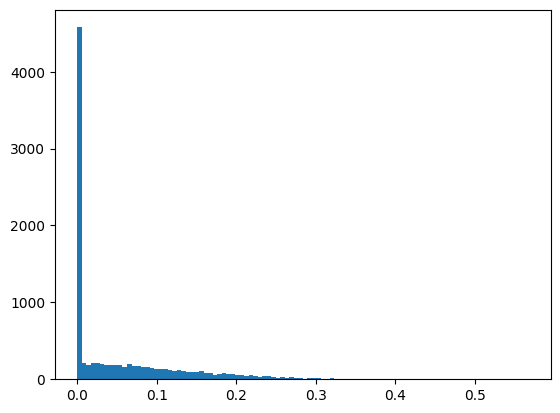

In [57]:
import matplotlib.pyplot as plt
plt.hist(Asian_option_values, bins=100)